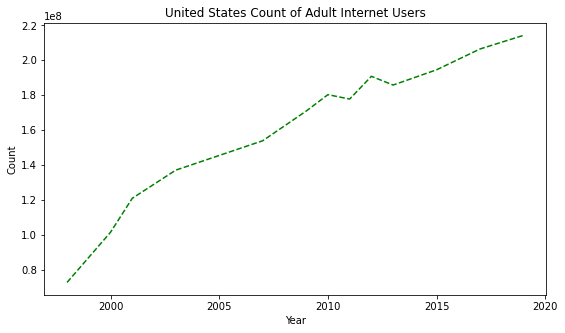

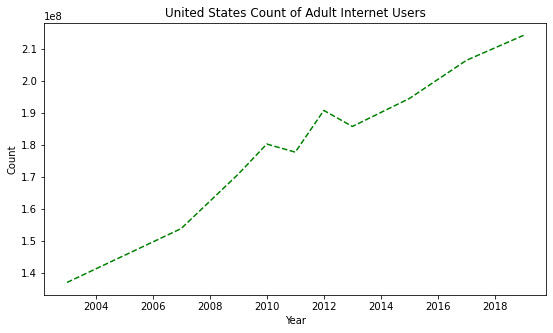

    dataset    usCount  ALCount  AKCount  AZCount  ARCount   CACount  COCount  \
10   Dec-98   72903221  1045586   238888  1393428   485140   8863011  1353954   
26   Aug-00  101599995  1466706   286053  1856935   716412  12155489  1946077   
46   Sep-01  121028390  1595336   329368  2203758   943929  14126113  2096097   
68   Oct-03  137145349  1933533   355029  2735170  1072625  16506811  2409304   
85   Oct-07  153955554  2059366   408529  3154463  1237738  18209609  2705482   
94   Oct-09  170931943  2326306   427854  3712400  1411122  20337212  3056760   
112  Oct-10  180335741  2623220   447175  3816240  1496097  21439210  3085440   
137  Jul-11  177807756  2574322   439254  3760993  1437187  20882561  3283928   
167  Oct-12  190824345  2576785   459961  3775814  1691641  22761218  3432939   
205  Jul-13  185826084  2561477   452574  3475474  1493922  22302692  3485927   
266  Jul-15  194563383  2800781   455253  3825072  1683031  23395892  3339925   
322  Nov-17  206481071  3028

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('ntia-analyze-table_2020-05-15.csv')
df = df.drop(columns=["description", "universe"], axis = 1)
iu_count_wSE = df[df.columns.drop(list(df.filter(regex='Prop')))]
iu_count = iu_count_wSE[iu_count_wSE.columns.drop(list(iu_count_wSE.filter(regex='SE')))]

adultInternetUser = iu_count.loc[iu_count['variable'] == 'adultInternetUser']
adultInternetUser = adultInternetUser.drop(columns=["variable"], axis = 1)

years = [1998, 2000, 2001, 2003, 2007, 2009, 2010, 2011, 2012, 2013, 2015, 2017, 2019]
usCount = adultInternetUser.loc[:,'usCount']

plt.figure(figsize=(9, 5))
plt.plot(years, usCount, 'g--')
plt.title('United States Count of Adult Internet Users')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(9, 5))
plt.plot(years[3:], usCount[3:], 'g--')
plt.title('United States Count of Adult Internet Users')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()


print(adultInternetUser)

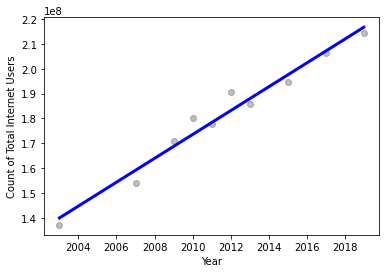

In [4]:
from sklearn import linear_model
from sklearn.metrics import r2_score
import numpy as np


x = years[3:]
x = np.array(x).reshape(-1, 1) 
y = usCount[3:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Fit the simple linear regression
regr.fit(x, y)

# Make predictions using the linear regression
y_pred = regr.predict(x)


# Plot 
plt.scatter(x, y,  color='black', alpha = 0.25)
plt.plot(x, y_pred, color='blue', linewidth=3)

plt.xlabel('Year')
plt.ylabel('Count of Total Internet Users')

plt.show()

In [5]:
print(y_pred)

[1.39945909e+08 1.59139833e+08 1.68736794e+08 1.73535275e+08
 1.78333756e+08 1.83132237e+08 1.87930718e+08 1.97527680e+08
 2.07124641e+08 2.16721603e+08]


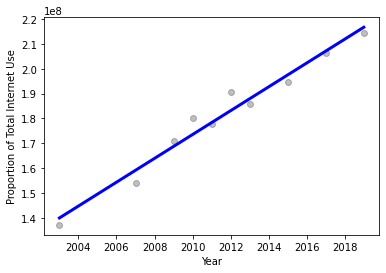

                            OLS Regression Results                            
Dep. Variable:                usCount   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.962
Method:                 Least Squares   F-statistic:                     226.0
Date:                Mon, 22 Nov 2021   Prob (F-statistic):           3.78e-07
Time:                        16:18:52   Log-Likelihood:                -166.36
No. Observations:                  10   AIC:                             336.7
Df Residuals:                       8   BIC:                             337.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -9.471e+09   6.42e+08    -14.753      0.0

/cluster/tufts/class/dss/2020/fall/shared/prod/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [6]:
# Fill in the ellipses below

import statsmodels.api as sm

# In order to have an intercept, we need to add a column of 1's to X
x2 = sm.add_constant(x)

# Fit the simple linear regression
sm_model = sm.OLS(y, x2)
results = sm_model.fit()



# Make predictions using the linear regression
y_pred = results.predict(x2)

# Plot 
plt.scatter(x, y,  color='black', alpha = 0.25)
plt.plot(x, y_pred, color='blue', linewidth=3)
plt.xlabel('Year')
plt.ylabel('Proportion of Total Internet Use')
plt.show()

print(results.summary())

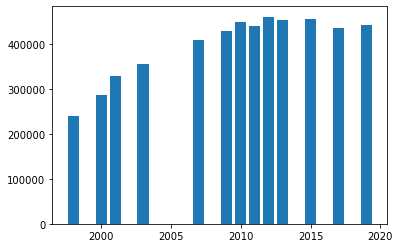

In [7]:

plt.bar(years, adultInternetUser.iloc[:,3])
plt.show()


In [8]:
state_count = adultInternetUser.drop(columns=["usCount"], axis=1)
print(state_count)


    dataset  ALCount  AKCount  AZCount  ARCount   CACount  COCount  CTCount  \
10   Dec-98  1045586   238888  1393428   485140   8863011  1353954   955086   
26   Aug-00  1466706   286053  1856935   716412  12155489  1946077  1431365   
46   Sep-01  1595336   329368  2203758   943929  14126113  2096097  1593018   
68   Oct-03  1933533   355029  2735170  1072625  16506811  2409304  1895241   
85   Oct-07  2059366   408529  3154463  1237738  18209609  2705482  1936049   
94   Oct-09  2326306   427854  3712400  1411122  20337212  3056760  2145458   
112  Oct-10  2623220   447175  3816240  1496097  21439210  3085440  2285865   
137  Jul-11  2574322   439254  3760993  1437187  20882561  3283928  2232894   
167  Oct-12  2576785   459961  3775814  1691641  22761218  3432939  2363568   
205  Jul-13  2561477   452574  3475474  1493922  22302692  3485927  2366287   
266  Jul-15  2800781   455253  3825072  1683031  23395892  3339925  2298735   
322  Nov-17  3028956   435214  4498823  1828093  246

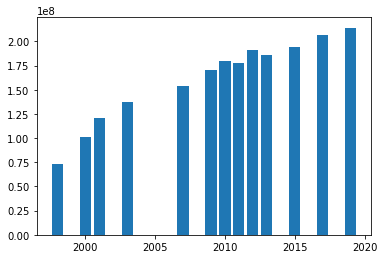

<Figure size 648x360 with 0 Axes>

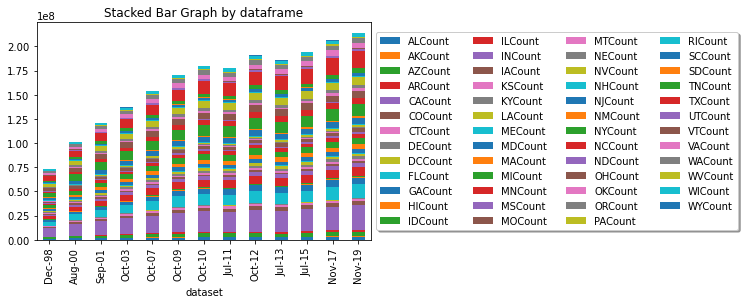

In [9]:
plt.bar(years, usCount)
plt.figure(figsize=(9, 5))
state_count.plot(x='dataset', kind='bar', stacked=True,
        title='Stacked Bar Graph by dataframe').legend(loc='center left', bbox_to_anchor=(1, 0.5), fancybox=True, shadow=True, ncol=4)

In [10]:
state_prop = pd.DataFrame()

j = 0
for i in usCount:
    date = years[j]
    state_prop[date] = state_count.iloc[j,1:].divide(i)
    j+=1
    
state_prop = state_prop.transpose()

state_prop.columns = ['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'FL', 'GA', 'HI',
       'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA', 'MI', 'MN',
       'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY', 'N', 'ND', 'OH',
       'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA',
       'WV', 'WI', 'WY']
print(state_prop)

             AL          AK         AZ          AR        CA         CO  \
1998  0.0143421  0.00327678  0.0191134  0.00665458  0.121572  0.0185719   
2000  0.0144361  0.00281548  0.0182769   0.0070513  0.119641  0.0191543   
2001  0.0131815  0.00272141  0.0182086  0.00779924  0.116717  0.0173191   
2003  0.0140984  0.00258871  0.0199436  0.00782108   0.12036  0.0175675   
2007  0.0133764  0.00265355  0.0204894  0.00803958  0.118278  0.0175731   
2009  0.0136095  0.00250307  0.0217186  0.00825546  0.118978  0.0178829   
2010  0.0145463  0.00247968  0.0211619  0.00829618  0.118885  0.0171094   
2011  0.0144781  0.00247039   0.021152  0.00808281  0.117445   0.018469   
2012  0.0135034  0.00241039  0.0197869  0.00886491  0.119278    0.01799   
2013  0.0137843  0.00243547  0.0187028  0.00803936  0.120019  0.0187591   
2015  0.0143952  0.00233987  0.0196598   0.0086503  0.120248  0.0171663   
2017  0.0146694  0.00210777  0.0217881  0.00885356  0.119153  0.0164102   
2019   0.015003  0.002060

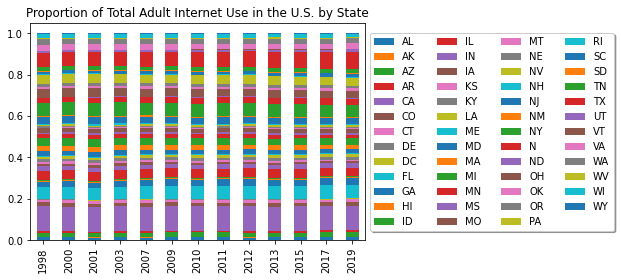

In [11]:

state_prop.plot(kind='bar', stacked=True,
        title='Proportion of Total Adult Internet Use in the U.S. by State').legend(loc='center left', bbox_to_anchor=(1, 0.5), fancybox=True, shadow=True, ncol=4)

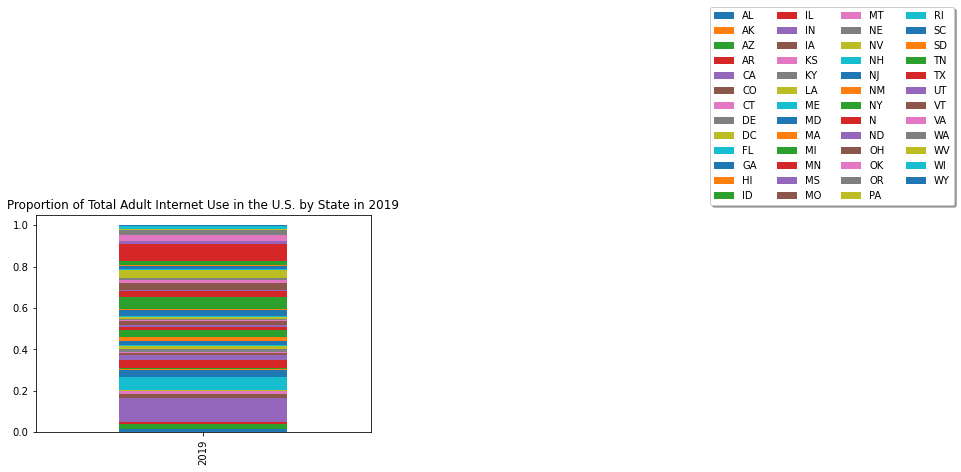

In [12]:
current = state_prop.iloc[12:]
current.plot(kind='bar', stacked=True,
        title='Proportion of Total Adult Internet Use in the U.S. by State in 2019').legend(loc='center left', bbox_to_anchor=(2, 1.5), fancybox=True, shadow=True, ncol=4)




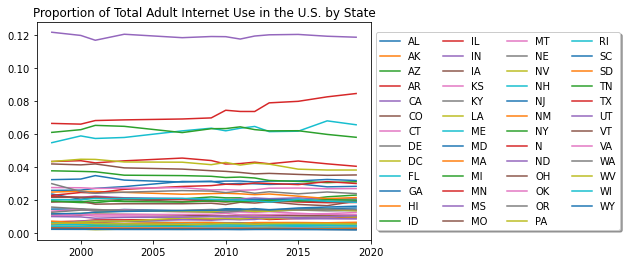

In [13]:
state_prop.plot(title='Proportion of Total Adult Internet Use in the U.S. by State').legend(loc='center left', bbox_to_anchor=(1, 0.5), fancybox=True, shadow=True, ncol=4)

In [14]:
print(current.transpose())

          2019
AL    0.015003
AK  0.00206023
AZ   0.0228392
AR   0.0093927
CA    0.118554
CO   0.0191587
CT   0.0109872
DE   0.0030157
DC  0.00238531
FL   0.0654651
GA   0.0316647
HI  0.00429279
ID  0.00561294
IL   0.0402979
IN   0.0205974
IA  0.00994771
KS  0.00853628
KY   0.0134483
LA   0.0132611
ME  0.00413412
MD   0.0192054
MA   0.0213267
MI   0.0309194
MN    0.018337
MS  0.00843006
MO   0.0189454
MT  0.00334093
NE  0.00587468
NV  0.00954207
NH  0.00474162
NJ   0.0281341
NM  0.00635539
NY   0.0578728
N    0.0298451
ND  0.00233296
OH   0.0350411
OK   0.0122658
OR   0.0139881
PA   0.0380209
RI  0.00347659
SC   0.0160868
SD  0.00266891
TN   0.0198321
TX   0.0844215
UT   0.0102998
VT   0.0020253
VA   0.0267689
WA    0.023736
WV  0.00534867
WI   0.0184519
WY  0.00170995
